In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Classificador-de-Vinhos/master/wine-dataset/wine_dataset.csv')

In [34]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [35]:
df['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [0]:
# como temos apenas dois tipos de vinhos, podemos modificar o valor de ambos (red == 0 e white == 1)
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

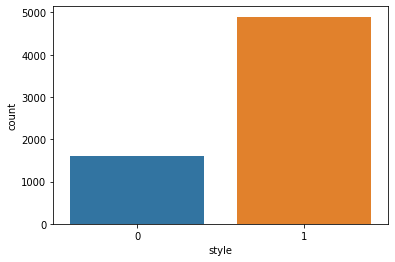

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(df['style'])
plt.show()

In [0]:
# PORCENTAGEM: 

# quantidade de vinhos branco no dataset
quant_1 = ((df.loc[df['style'] == 1].shape[0] * 100) / df['style'].shape[0])

# quantidade de vinhos vermelho no dataset
quant_0 = ((df.loc[df['style'] == 0].shape[0] * 100) / df['style'].shape[0])

In [0]:
# separando os dados (target == meu objetivo)
target = df['style']
x = df.drop('style', axis=1)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3)

In [47]:
from sklearn.ensemble import ExtraTreesClassifier 

modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [54]:
acrc = modelo.score(x_test, y_test)
acrc = acrc * 100
print(f'{acrc:.2f}% de acerto!')

99.49% de acerto!


In [0]:
pred = modelo.predict(x_test[100:125])

In [70]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test[100:125], pred)
rmse 

0.0